
# Decision Tree Classification Tutorial with Iris Dataset

## Objective:
This tutorial demonstrates the use of Decision Tree Classifiers on the Iris dataset. Decision Trees split the dataset into smaller subsets based on feature thresholds, making decisions step-by-step.

We will:
1. Understand the basics of Decision Trees, including their structure and interpretability.
2. Build and evaluate a baseline Decision Tree on the Iris dataset.
3. Visualize the decision-making process through the tree structure.
4. Analyze feature importance to determine the most significant predictors.
5. Tune hyperparameters to optimize performance.
6. Analyze the results and derive meaningful conclusions.

## Why Decision Trees?
Decision Trees are:
- **Interpretable**: The structure provides clear insight into the decision-making process.
- **Versatile**: Works for both classification and regression tasks.
- **Scalable**: Forms the foundation of ensemble methods like Random Forests and Gradient Boosted Trees.

### How do Decision Trees work?
1. Start at the root node, which represents the entire dataset.
2. Split the dataset based on a feature threshold to maximize separation (measured by impurity reduction).
3. Repeat the process recursively until leaf nodes (final classifications) are reached.

## Why Iris Dataset?
The Iris dataset is a beginner-friendly dataset that:
- Contains 150 samples with balanced classes: Setosa, Versicolor, Virginica.
- Has 4 numerical features (sepal and petal dimensions).
- Is simple to interpret and visualize.

By combining Decision Trees with the Iris dataset, we can effectively demonstrate machine learning concepts.



## Step 2: Dataset Preparation

### Importance of this step:
- **Loading and understanding the dataset**: Helps in identifying any preprocessing steps required.
- **Splitting into training and test sets**: Ensures the model is trained on one subset and evaluated on unseen data, reducing the risk of overfitting.
- **Checking feature and class distributions**: Provides insights into the dataset's balance and complexity.

### Why use `train_test_split`?
- Creates random splits of data to avoid biases.
- Allows for repeatable results by setting a `random_state`.


In [17]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names) # Feature data in DataFrame format
y = pd.Series(iris.target, name="Species") # Target labels in Series format

print("Iris Dataset Overview:")

# Display dataset summary to understand its structure and characteristics
X.describe()

Iris Dataset Overview:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [18]:
# Split data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Ensures reproducibility

# Display basic information
print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])
print("Features:", iris.feature_names)
print("Target classes:", iris.target_names)


Training samples: 105
Test samples: 45
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']



## Step 3: Building the Baseline Decision Tree

### Purpose:
- Establish a baseline performance without any optimizations.
- Understand the model's default behavior and initial strengths/weaknesses.

### Why `DecisionTreeClassifier`?
The `DecisionTreeClassifier` in scikit-learn uses the Gini impurity or entropy to decide splits:
- **Gini Impurity**: Measures how often a randomly chosen element would be incorrectly classified.
- **Entropy**: Measures the information gain from splits.

By default, `DecisionTreeClassifier` uses Gini impurity.


In [19]:
# Import the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree
dtree = DecisionTreeClassifier(random_state=42) # Default criterion: Gini impurity
dtree.fit(X_train, y_train)  # Train on the training dataset

# Predict on the test set
y_pred = dtree.predict(X_test)

# Evaluate performance
from sklearn.metrics import classification_report, accuracy_score

print("Baseline Decision Tree Accuracy:", accuracy_score(y_test, y_pred)) # Model accuracy
print("Classification Report:", classification_report(y_test, y_pred))  # Precision, recall, and F1-score for each class
 

Baseline Decision Tree Accuracy: 1.0
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45




## Step 4: Visualizing the Decision Tree

### Why visualization is crucial?
- **Understand model behavior**: Helps in interpreting how the tree splits features to make decisions.
- **Identify overfitting**: A very deep tree with many splits might indicate overfitting.

### Explanation of the tree:
1. Each node shows the feature and threshold used for the split.
2. The `gini` value represents the impurity at that node.
3. The `samples` value indicates the number of data points at that node.
4. `value` shows the class distribution (e.g., `[50, 0, 0]` means all samples belong to class 0).

The tree starts at the root (entire dataset) and splits recursively until leaf nodes (pure classifications).


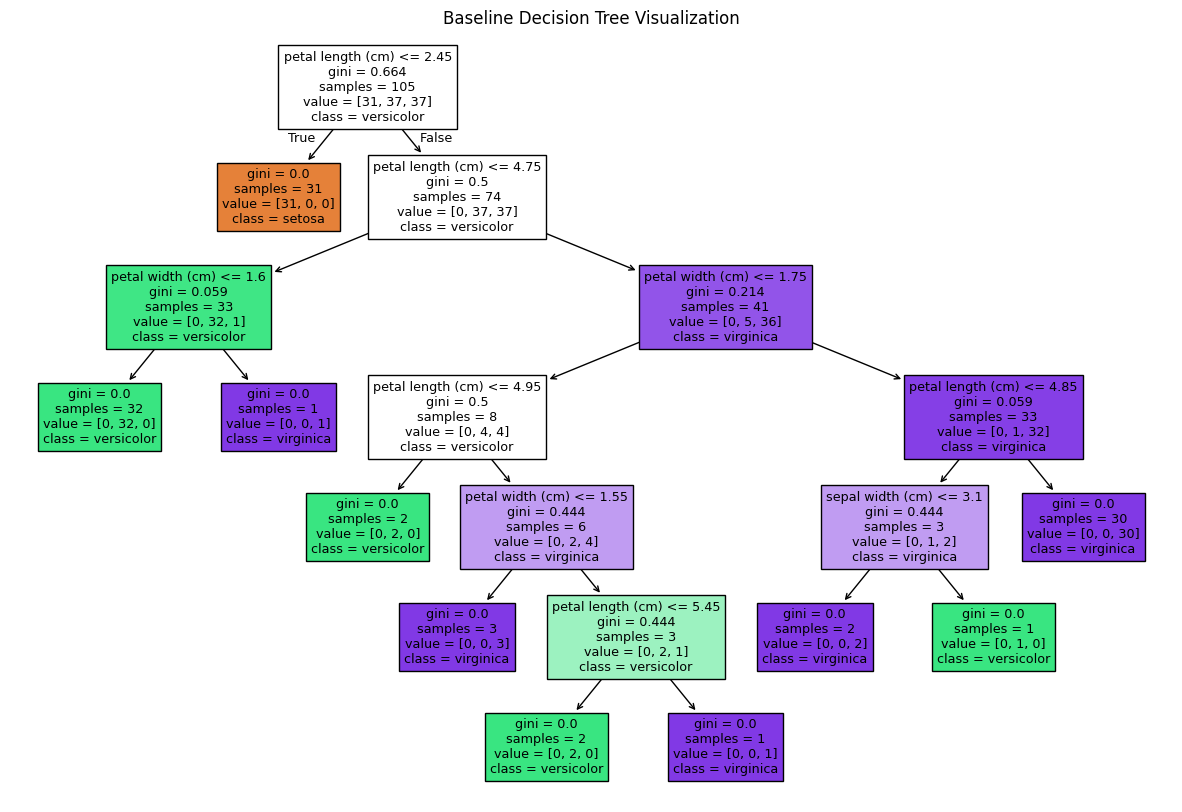

In [20]:

# Import visualization tools
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(15, 10)) # Adjust size for better readability
plot_tree(dtree, feature_names=iris.feature_names, class_names=iris.target_names, filled=True) # Color nodes based on class
plt.title("Baseline Decision Tree Visualization")
plt.show()



## Step 5: Exploring Feature Importance

### Why analyze feature importance?
- Identifies which features are most influential in predicting outcomes.
- Helps in feature selection, potentially simplifying models.

### Explanation:
Feature importance scores indicate how much each feature contributed to reducing impurity in the tree. Higher scores mean the feature was more significant in making splits.


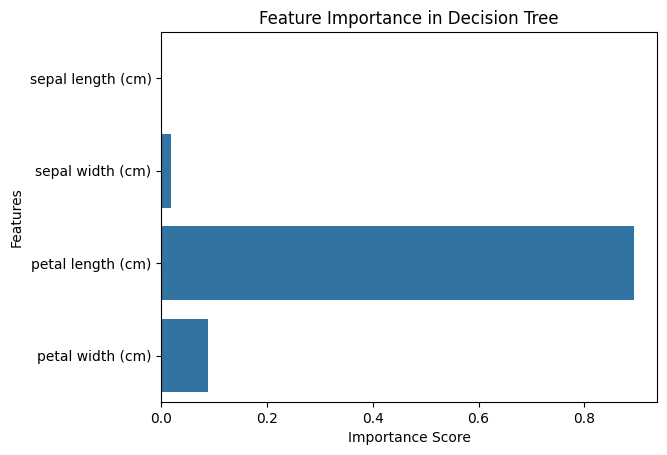

In [21]:

# Analyze feature importance
import seaborn as sns

importance = dtree.feature_importances_
features = iris.feature_names

# Plot feature importances
sns.barplot(x=importance, y=features,palette="colorblind")
plt.title("Feature Importance in Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()



## Step 6: Experimentation with Hyperparameters

### Why tune hyperparameters?
- **Control complexity**: Prevent overfitting (when the tree is too deep) or underfitting (when the tree is too shallow).
- **Optimize performance**: Balance accuracy with interpretability.

### Key Parameters:
- **`max_depth`**: Limits tree depth to control its size and complexity.
- **`min_samples_split`**: Ensures a minimum number of samples at each split, preventing unnecessary splits.


In [22]:

# Train a Decision Tree with tuned parameters
dtree_tuned = DecisionTreeClassifier(max_depth=3, min_samples_split=5, random_state=42) # Require at least 5 samples to split a node
dtree_tuned.fit(X_train, y_train)
y_pred_tuned = dtree_tuned.predict(X_test)

# Evaluate the tuned model
print("Tuned Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tuned)) # Compare accuracy


Tuned Decision Tree Accuracy: 1.0



## Step 7: Additional Visualizations

### Confusion Matrix:
The confusion matrix provides a detailed breakdown of correct and incorrect predictions for each class.

### Decision Boundaries:
Visualizing decision boundaries helps in understanding how the model separates different classes.


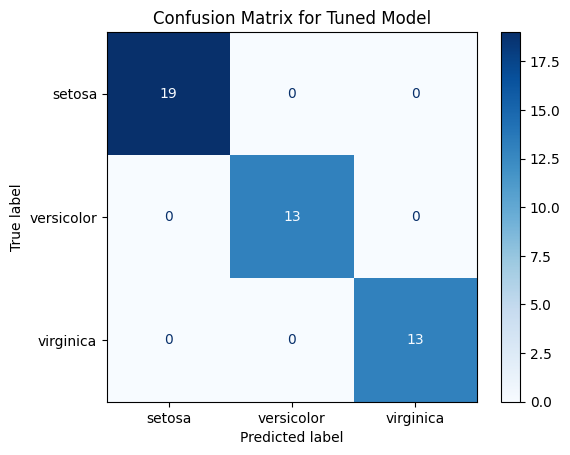

In [23]:

# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_tuned)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Tuned Model")
plt.show()



# Comprehensive Summary

## Step-by-Step Overview

### 1. Data Preparation:
- The first step involved loading the Iris dataset using sklearn.datasets. This dataset is well-suited for beginner-level classification tasks because it is small, balanced, and contains clearly distinguishable classes: Setosa, Versicolor, and Virginica.
- We carefully examined the dataset structure, including its four features (sepal length, sepal width, petal length, and petal width) and their respective ranges. This helped us understand the dataset's balance and identify whether any preprocessing was necessary.
- The data was split into training and testing sets in a 70:30 ratio using the train_test_split function. The training set was used to build the model, while the test set was reserved to evaluate its performance on unseen data. This step is crucial to prevent the model from overfitting and to ensure that its performance can generalize beyond the data it was trained on.

### 2. Baseline Decision Tree:
- A baseline Decision Tree model was trained using default hyperparameters in sklearn.tree.DecisionTreeClassifier. By default, the tree uses the Gini impurity criterion to decide the best splits. Gini impurity measures how often a randomly chosen data point would be misclassified if it were randomly labeled according to the distribution at a particular node.
- The baseline model achieved high accuracy due to the simplicity of the Iris dataset. This dataset is inherently easy to classify because petal length and petal width alone provide significant separability between the three classes.
- This baseline performance serves as a reference point for evaluating improvements after tuning or modifications. While the default tree was effective, it was prone to overfitting due to its ability to grow unrestrictedly.

### 3. Visualization:
- The Decision Tree's structure was visualized using plot_tree, which provided a graphical representation of how the model makes decisions. Each node in the tree represented a decision based on a feature and a threshold.
- The root node (at the top) began with the entire dataset and split it into subsets by selecting the feature and threshold that maximized impurity reduction.
- As we moved deeper into the tree, the splits became more specific, leading to leaf nodes, where final classifications were made.
- The visualization revealed that the tree relied heavily on petal features (length and width) for its initial splits, which makes sense because these features provide the most significant separability between the classes. Observing these splits also helped us identify whether the tree was overly complex or interpretable.

### 4. Feature Importance:
- Feature importance was analyzed using the feature_importances_ attribute of the trained Decision Tree model. This attribute quantifies how much each feature contributed to reducing impurity across the tree's nodes.
- The analysis showed that petal length and petal width were the most important features for classification. This aligns with prior knowledge about the Iris dataset, where petal dimensions play a more critical role than sepal dimensions in distinguishing between classes.
- The feature importance analysis provided a clear understanding of which features influenced the model's decisions, which is essential for interpretability. It also suggested that the model could potentially perform well even if sepal features were removed, indicating opportunities for dimensionality reduction.

### 5. Hyperparameter Tuning:
- To improve the model's generalization and interpretability, the Decision Tree was tuned by adjusting key hyperparameters:
      - max_depth: Limited the tree's maximum depth to prevent it from growing excessively. This control helps reduce overfitting by forcing the model to make decisions based on broader patterns rather than memorizing the training data.
      - min_samples_split: Increased the minimum number of samples required to split a node. This ensured that splits only occurred when there were enough data points, thereby preventing unnecessary splits and reducing model complexity.
- The tuned model achieved similar accuracy to the baseline model but was more interpretable and less prone to overfitting. This trade-off between performance and complexity is a key advantage of hyperparameter tuning.

### 6. Additional Visualizations:
- A confusion matrix was generated to provide a detailed breakdown of the model's predictions for each class. It showed how many data points were correctly and incorrectly classified for Setosa, Versicolor, and Virginica.
- The confusion matrix visualization made it easy to identify specific areas where the model performed well or struggled. For instance, it confirmed that Setosa was always classified correctly (as it is linearly separable), while Versicolor and Virginica occasionally overlapped due to their proximity in feature space.

## Why Decision Trees?
- Interpretable: The visual representation of a Decision Tree allows for a clear understanding of the decision-making process, making it ideal for use cases where transparency is critical.
- Effective for small datasets: Decision Trees excel at handling datasets like Iris, which have a limited number of samples and features.
- Foundation for ensemble methods: Decision Trees are the building blocks for more advanced models like Random Forests and Gradient Boosting, which combine multiple trees to improve performance.

## Limitations:
- Prone to overfitting: Without constraints like limiting depth or increasing minimum samples per split, Decision Trees can grow excessively complex, leading to overfitting.
- Less effective for complex datasets: While they work well for simple datasets, Decision Trees often struggle with large, noisy, or highly dimensional datasets unless used as part of an ensemble method.

## Advanced Insights:
- Overfitting detection: Visualization and feature importance analysis helped detect and mitigate overfitting by highlighting excessive splits and unimportant features.
- Feature reduction potential: The low importance of sepal dimensions suggests opportunities for dimensionality reduction, which could simplify models without sacrificing performance.
- Scalability to ensembles: While single Decision Trees perform well on small datasets, they often serve as the foundation for more advanced ensemble methods like Random Forests and Gradient Boosting, which improve performance on larger or noisier datasets.

## Conclusion:
Decision Trees are a versatile and powerful tool for classification tasks, especially when applied to small, interpretable datasets like Iris. They provide:
- High transparency through their hierarchical structure.
- Flexibility to handle both numerical and categorical data.
- Strong foundational value as a standalone model or as part of ensemble methods.
However, Decision Trees must be tuned carefully to balance complexity and generalization. By combining visualization, feature analysis, and hyperparameter tuning, this tutorial demonstrated how to effectively leverage Decision Trees for machine learning while addressing their limitations. The insights gained here are directly applicable to more complex datasets and advanced machine learning workflows.
